# What factors contribute to the success or failure of a student? 

This data was collected about students at two different high schools in Portugual. The grades are from their math or Portuguese course. 

Questions/thougths to explore:

1) Investigate categorical variables. Make countplots. 

2) Investigate numerica variables. Look at describe. Look at histograms and scatterplots. 

3) Create new column with G3 given as US letter grade. 

4) Look at correlations for absences, G1, G2, and G3. 

5) Look at summary statistics for A/B/C students versus D/F students. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
student = pd.read_csv('student_data.csv')
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [3]:
student.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
student_num = student.select_dtypes(include = ['int64'])
student_obj = student.select_dtypes(include = ['object'])

In [5]:
student_obj.shape

(395, 17)

In [6]:
student_num.shape

(395, 16)

In [7]:
print(student_obj.columns)

Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')


In [8]:
student_obj = student_obj.astype('category')

## Explainations of Categorical Variables and their Labels



1) **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)

2) **sex** - student's sex (binary: 'F' - female or 'M' - male)

3) **address** - student's home address type (binary: 'U' - urban or 'R' - rural)

4) **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

5) **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

6) **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police),   'at_home' or 'other')

7) **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police),   'at_home' or 'other')

8) **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

9) **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')

10) **schoolsup** - extra educational support (binary: yes or no)

11) **famsup** - family educational support (binary: yes or no)

12) **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

13) **activities** - extra-curricular activities (binary: yes or no)

14) **nursery** - attended nursery school (binary: yes or no)

15) **higher** - wants to take higher education (binary: yes or no)

16) **internet** - Internet access at home (binary: yes or no)

17) **romantic** - with a romantic relationship (binary: yes or no)


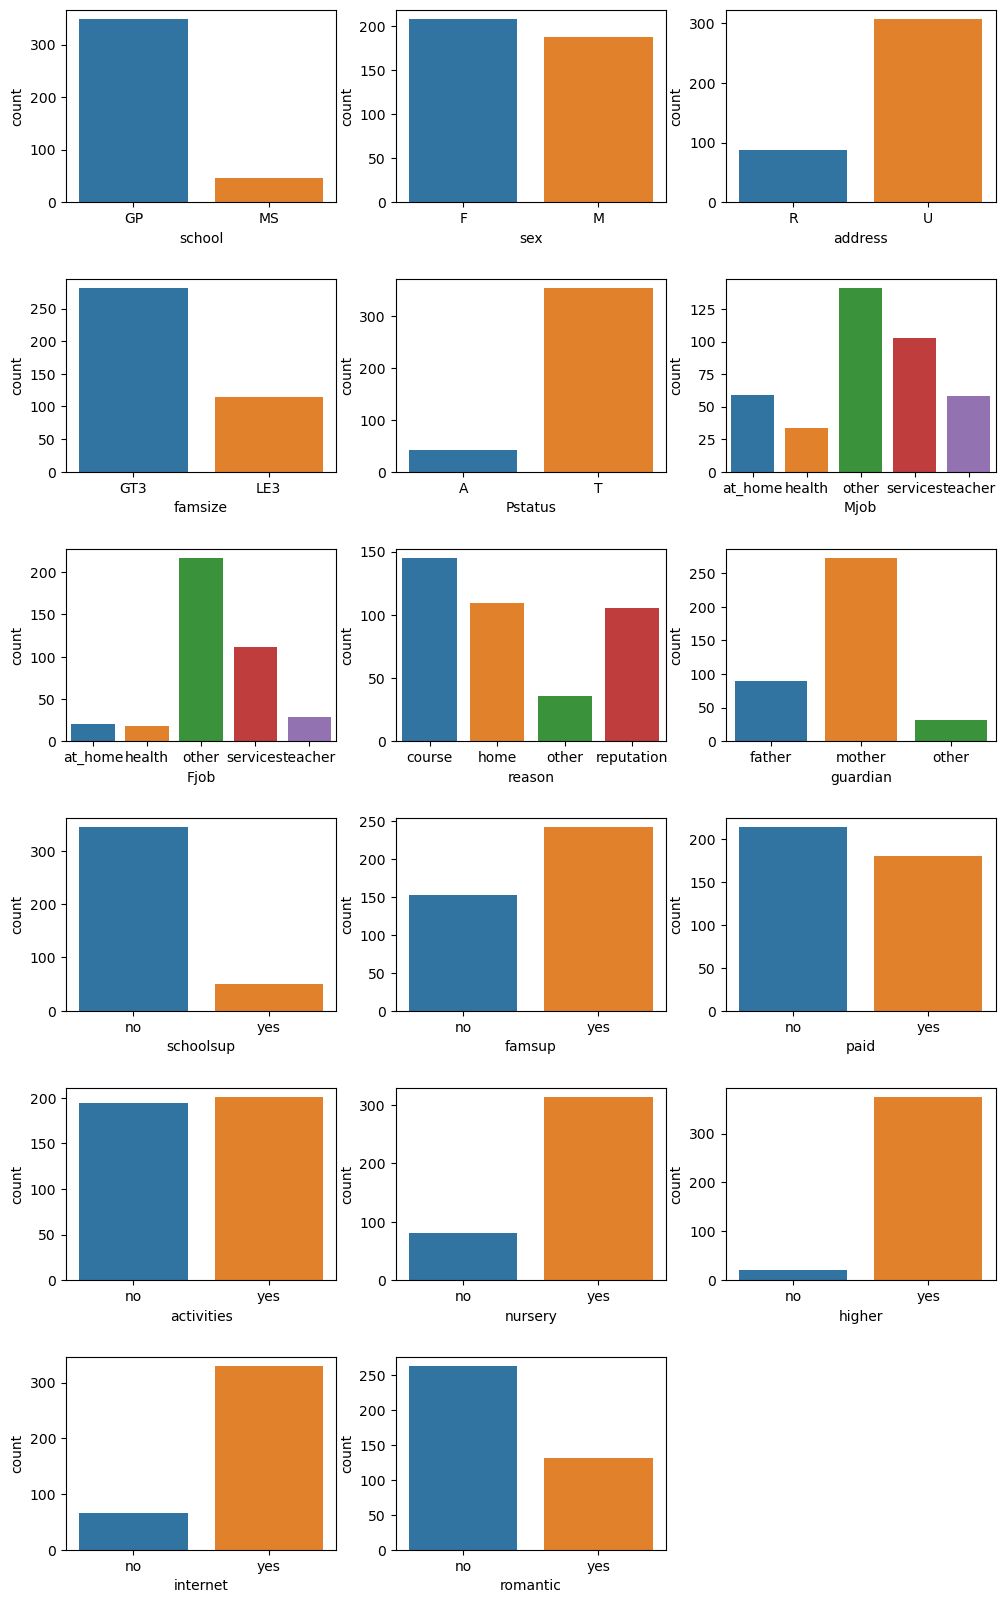

In [9]:
fig, ax = plt.subplots(6, 3, figsize = (12,20))
plt.subplots_adjust(wspace = 0.22, hspace = 0.4)
sns.countplot(x = 'school', data = student_obj, ax = ax[0,0])
sns.countplot(x = 'sex', data = student_obj, ax = ax[0,1])
sns.countplot(x = 'address', data = student_obj, ax = ax[0,2])
sns.countplot(x = 'famsize', data = student_obj, ax = ax[1,0])
sns.countplot(x = 'Pstatus', data = student_obj, ax = ax[1,1])
sns.countplot(x = 'Mjob', data = student_obj, ax = ax[1,2])
sns.countplot(x = 'Fjob', data = student_obj, ax = ax[2,0])
sns.countplot(x = 'reason', data = student_obj, ax = ax[2,1])
sns.countplot(x = 'guardian', data = student_obj, ax = ax[2,2])
sns.countplot(x = 'schoolsup', data = student_obj, ax = ax[3,0])
sns.countplot(x = 'famsup', data = student_obj, ax = ax[3,1])
sns.countplot(x = 'paid', data = student_obj, ax = ax[3,2])
sns.countplot(x = 'activities', data = student_obj, ax = ax[4,0])
sns.countplot(x = 'nursery', data = student_obj, ax = ax[4,1])
sns.countplot(x = 'higher', data = student_obj, ax = ax[4,2])
sns.countplot(x = 'internet', data = student_obj, ax = ax[5,0])
sns.countplot(x = 'romantic', data = student_obj, ax = ax[5,1])
ax[-1, -1].axis('off')
plt.show();

## Observations on Categorical Variables:

Most of our students attend Gabriel Pereira School. 

We have slightly more females than males.

Most of them live in an urban area. 

Most of them have more than 3 people in their families. 

Most families have both parents living together. 

Most moms and dads are employed in "other" type jobs. We do see more stay-at-home moms than dads. More moms work in public serice and teaching than dads. 

Most students picked their school based on the courses offered. Otherwise it was the school closest to their home or that had the better reputation. 

Most students list their mother as their guardian. 

Few students recieve extra educational support at shcool, but most do have educational support from home. 

A slight majority of the students are taking additional courses for which they pay extra. 

It is almost half-half with reguards to participation in extra-curricular activies. 

Most of the students were sent to nursery school (pre-school?).

Almost all students want to go on to higher education. 

Most students do have internet access at home. 

Most students are not in a romantic relationship. 

# Explaination of Numeric Variables and their Values


1) **age** - student's age (numeric: from 15 to 22)
2) **Medu** - mother's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
3) **Fedu** - father's education (numeric: 0 - none,  1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)
4) **traveltime** - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
5) **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
6) **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
7) **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
8) **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
9) **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
10) **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
11) **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
12) **health** - current health status (numeric: from 1 - very bad to 5 - very good)
13) **absences** - number of school absences (numeric: from 0 to 93)

### These grades are related with the course subject, Math or Portuguese:
14) **G1** - first period grade (numeric: from 0 to 20)
15) **G2** - second period grade (numeric: from 0 to 20)
16) **G3** - final grade (numeric: from 0 to 20, output target)



''

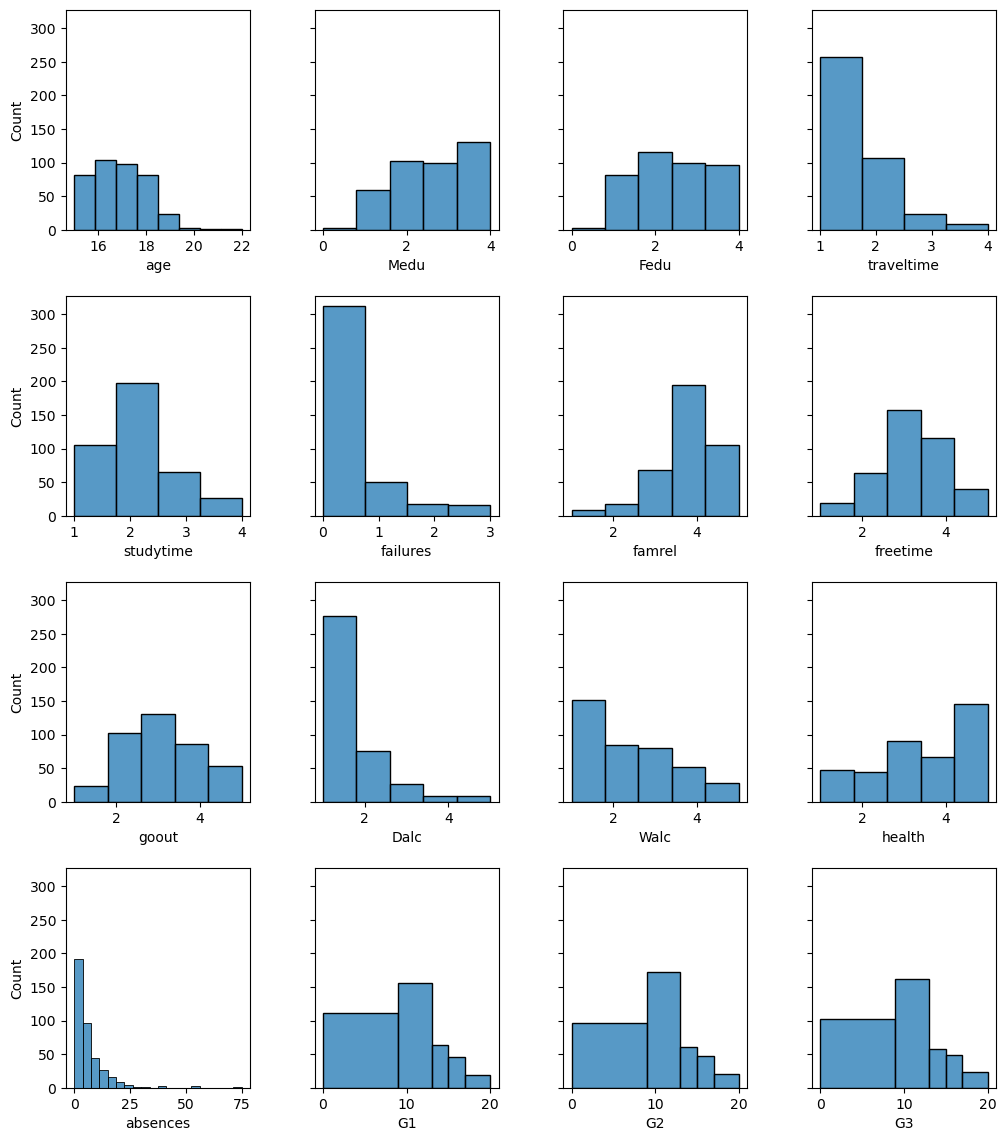

In [10]:
fig, ax = plt.subplots(4, 4, sharey = True, figsize = (12, 14))
plt.subplots_adjust(wspace = 0.35, hspace = 0.3)
sns.histplot(x = 'age', data = student, ax = ax[0,0], bins = 8)
sns.histplot(x = 'Medu', data = student, ax = ax[0, 1], bins = 5)
sns.histplot(x = 'Fedu', data = student, ax = ax[0, 2], bins = 5)
sns.histplot(x = 'traveltime', data = student, ax = ax[0, 3], bins = 4)
sns.histplot(x = 'studytime', data = student, ax = ax[1,0], bins = 4)
sns.histplot(x = 'failures', data = student, ax = ax[1,1], bins = 4)
sns.histplot(x = 'famrel', data = student, ax = ax[1, 2], bins = 5)
sns.histplot(x = 'freetime', data = student, ax = ax[1, 3], bins = 5)
sns.histplot(x = 'goout', data = student, ax = ax[2, 0], bins = 5)
sns.histplot(x = 'Dalc', data = student, ax = ax[2, 1], bins = 5)
sns.histplot(x = 'Walc', data = student, ax = ax[2,2], bins = 5)
sns.histplot(x = 'health', data = student, ax = ax[2, 3], bins = 5)
sns.histplot(x = 'absences', data = student, ax = ax[3,0], bins = 20)
sns.histplot(x = 'G1', data = student, ax = ax[3,1], bins = [0, 9, 13, 15, 17, 20])
sns.histplot(x = 'G2', data = student, ax = ax[3,2], bins = [0, 9, 13, 15, 17, 20])
sns.histplot(x = 'G3', data = student, ax = ax[3,3], bins = [0, 9, 13, 15, 17, 20])
;

## Obeservations on Numeric Variables:

Most students are 15-18 years old. Being in high school beyond 18 is unusal. Look at scores of older students...

For Medu and Fedu, responses of 0, 1, or 2 indicate that the parent did not finish highschool. Does this affect the performance of their kids?

Most students travel 30 minutes or less to get to school. Do students with commutes over 30 struggle more?

Most students study 2-5 hours a week or less. Are more successful students studying more?

Most students have not failed before. Of the students failing in G3, how many have failed courses before?

Most students feel like they have a good relationship with their family. If they responded 1 or 2, what are their scores like?

Freetime looks like pretty close to normal. Most responded 3, but these numbers are not well explained. Similar for goout. Pretty normal distribution, with most responding 3, but I'm not sure how to interpret these values. Number of times going out per week?

Dalc and Walc are for weekday and weekend alcohol consumption. Are students that drink more struggling in school?

Most students feel positivly about their health. If they responded 1 or 2, are they struggling more in school?

Absences are really skewed with a long right tail running as far as 75. Look at correlation with G3.

G1 and G2 look really similar to G3. What is the correlation between these? I'm betting pretty high...


# A note about grading scale in Portugal...

Portuagal uses a 20-point grading system in their high schools. The following conversion shows equivalent US grades:

18 to 20 - Excellent = US A

16 and 17 - Very good = US B

14 and 15 - Good = US C

10 to 13 - Sufficient = US D

0 to 9 - Fail = US F

I think it will be helpful to create a category column to  store the corresponding US letter grade for each G3 score. 

In [11]:
student['us_grade'] = pd.cut(student['G3'], bins = [-np.inf, 9, 13, 15, 17, 20], labels = ['F', 'D', 'C', 'B', 'A'])

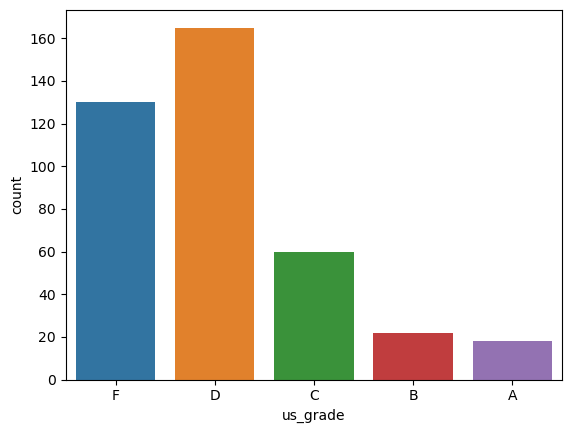

In [12]:
sns.countplot(x = 'us_grade', data = student)
plt.show()

## Questions that came to mind:

Let's look at grades for students grouped by their responses to the following: 

1) address? Is rural or urban associated with lower grades? 
    
2) family size? Is a there a connection between G3 and number of people in household?
    
3) Pstatus? Are students with separated parents more likely to struggle?

4) sex? Is there a difference in grades for males and females? 
    
5) schoolsup, famsup? How do these correlate with G3? Look for students that said no to both...What is G3?
    
6) higher? What do the students that said no, typically score?
    
7) internet? Is there a correlation with rural? Is there a correlation with lower scores in response is no? 

8) Are older students scoring lower?

9) For students whose mom and/or dad did not finish high school, what are their grades like? 

10) Look at pairplot for df of absences, G1, G2, and G3


## It would be interesting to look for clusters within this dataset.

### First let's see if there is any difference between the grades of rural students versus urban students.

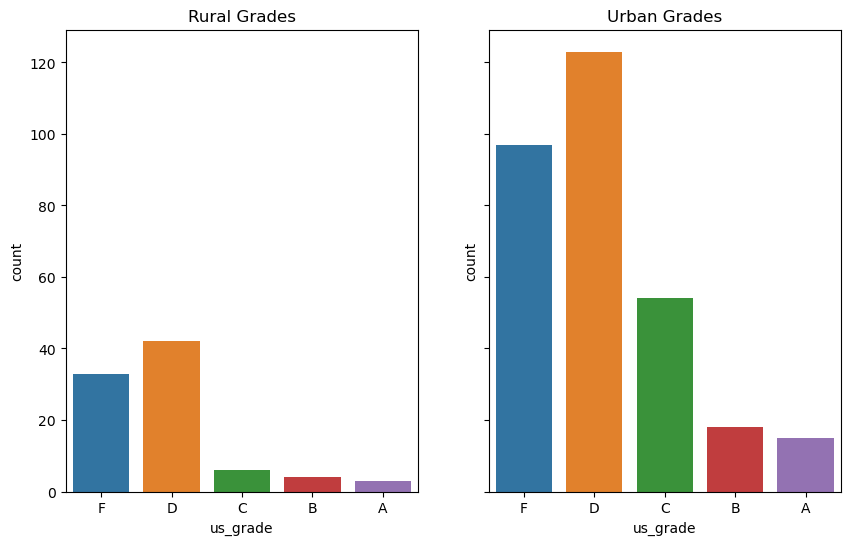

In [13]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['address']== 'R'], ax = ax[0])
ax[0].set_title('Rural Grades')
sns.countplot(x = 'us_grade', data = student.loc[student['address']== 'U'], ax = ax[1])
ax[1].set_title('Urban Grades')
plt.show();

## We do see fewer A's, B's, and C's in the students from rural areas. 


### Now let's looks at us_grade grouped by family size. 

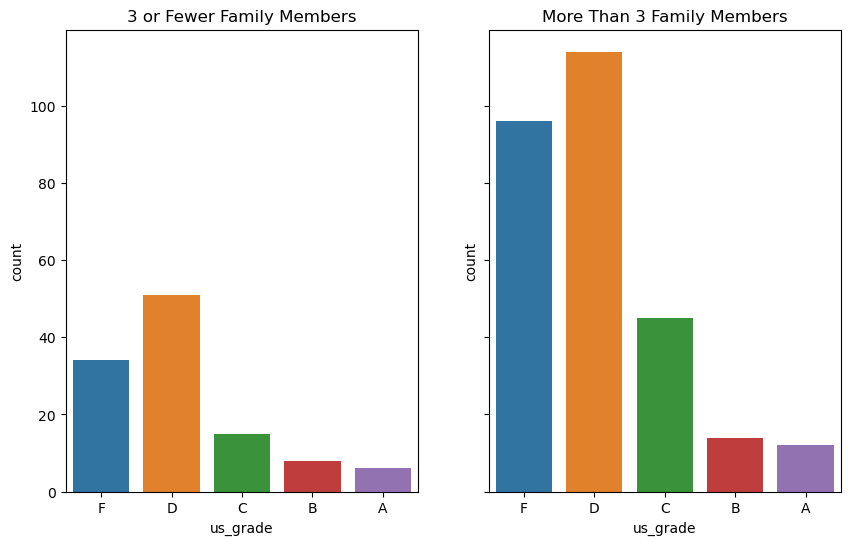

In [14]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['famsize']== 'LE3'], ax = ax[0])
ax[0].set_title('3 or Fewer Family Members')
sns.countplot(x = 'us_grade', data = student.loc[student['famsize']== 'GT3'], ax = ax[1])
ax[1].set_title('More Than 3 Family Members')
plt.show();

## The distributions are very similar shapes.

### Next let's look at grades for students whose parents live together versus those that live apart. 
### Note! I'm going to give them different y-axes this time. 

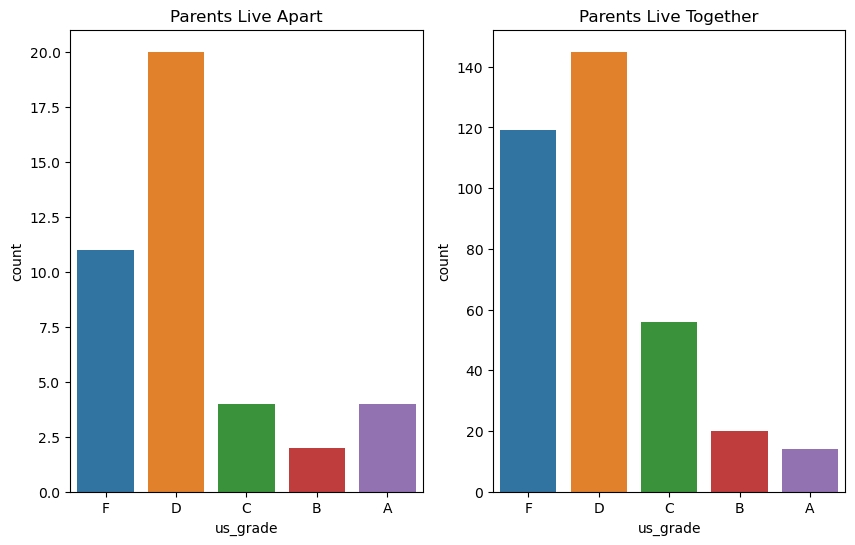

In [15]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['Pstatus']== 'A'], ax = ax[0])
ax[0].set_title('Parents Live Apart')
sns.countplot(x = 'us_grade', data = student.loc[student['Pstatus']== 'T'], ax = ax[1])
ax[1].set_title('Parents Live Together')
plt.show();

## Interesting changes in the A to B ratios... 

### Let's see if there is a difference in grades for males and females.

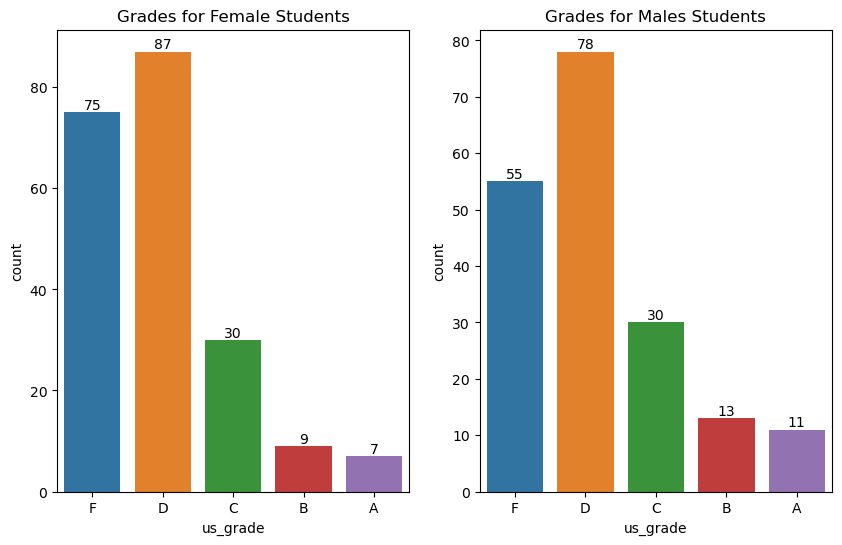

In [16]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['sex']== 'F'], ax = ax[0])
ax[0].set_title('Grades for Female Students')
for container in ax[0].containers:
    ax[0].bar_label(container)
sns.countplot(x = 'us_grade', data = student.loc[student['sex']== 'M'], ax = ax[1])
ax[1].set_title('Grades for Males Students')
for container in ax[1].containers:
    ax[1].bar_label(container)
plt.show();

In [17]:
student['sex'].value_counts()

F    208
M    187
Name: sex, dtype: int64

In [18]:
print('Percentages for Females')
print("A's: ", round(7/208*100, 2))
print("B's: ", round(9/208*100, 2))
print("C's: ", round(30/208*100, 2))
print("D's: ", round(87/208*100, 2))
print("F's: ", round(75/208*100, 2))

Percentages for Females
A's:  3.37
B's:  4.33
C's:  14.42
D's:  41.83
F's:  36.06


In [19]:
print('Percentages for Males')
print("A's: ", round(11/187*100, 2))
print("B's: ", round(13/187*100, 2))
print("C's: ", round(30/187*100, 2))
print("D's: ", round(78/187*100, 2))
print("F's: ", round(55/187*100, 2))

Percentages for Males
A's:  5.88
B's:  6.95
C's:  16.04
D's:  41.71
F's:  29.41


## Observations

Fewer female students score A's, B's, and C's. The percent scoring D's is almost the same. A higher percent of females fail than males. 

### Next let's see if there is a difference in grades for students that receive educational support at school.

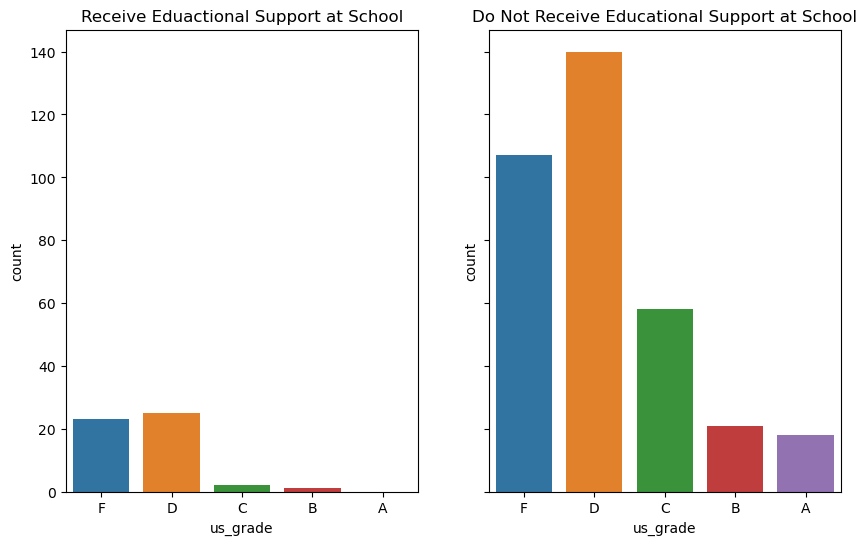

In [20]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['schoolsup']== 'yes'], ax = ax[0])
ax[0].set_title('Receive Eduactional Support at School')
sns.countplot(x = 'us_grade', data = student.loc[student['schoolsup']== 'no'], ax = ax[1])
ax[1].set_title('Do Not Receive Educational Support at School')
plt.show();

## Observations:

Looks like few students take advantage of eduactional support at school. 

The majority of students in educational support at school are still struggling. 

However, we see that many struggling students are not utilizing the educational support provided at school. 

### Let's see if there a difference for students getting educational support at home. 

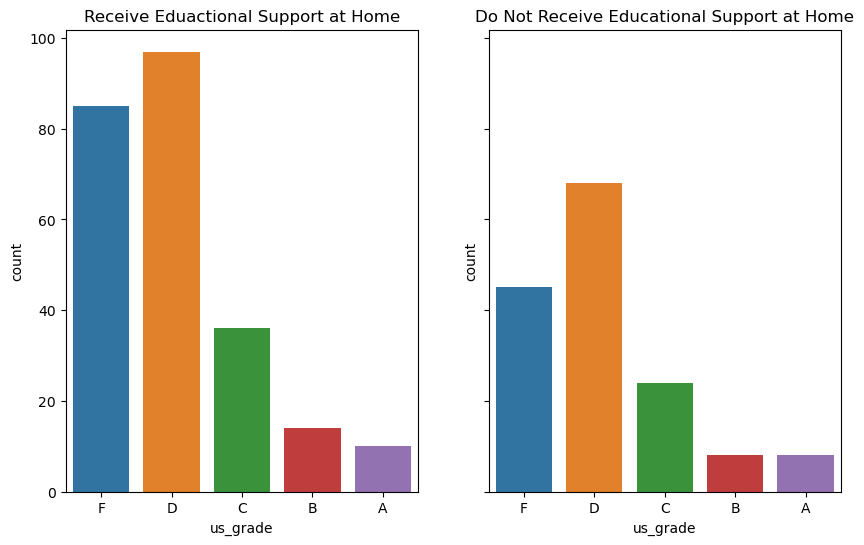

In [21]:
fig, ax = plt.subplots(1, 2,sharey = True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['famsup']== 'yes'], ax = ax[0])
ax[0].set_title('Receive Eduactional Support at Home')
sns.countplot(x = 'us_grade', data = student.loc[student['famsup']== 'no'], ax = ax[1])
ax[1].set_title('Do Not Receive Educational Support at Home')
plt.show();

## Observations:

These distributions look very similar. Most students do receive educational support at home, but the breakdown of grades is very similar to the students that do not. 

### Next, is there a difference in grades for students that want to go to college versus those that do not. 

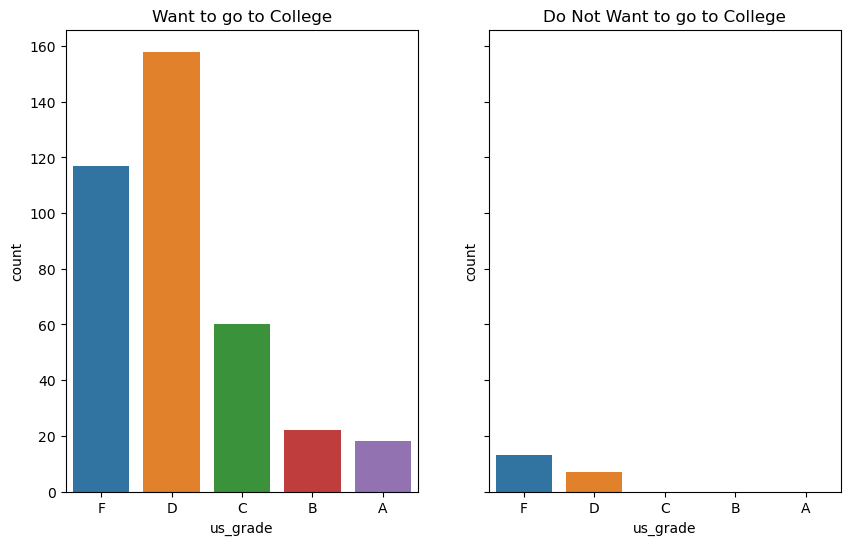

In [22]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['higher']== 'yes'], ax = ax[0])
ax[0].set_title('Want to go to College')
sns.countplot(x = 'us_grade', data = student.loc[student['higher']== 'no'], ax = ax[1])
ax[1].set_title('Do Not Want to go to College')
plt.show();

## Observations:

Most students, from all grade categories, want to go on to college. Of the students that do not, all of them are struggling. 

### Last for the categorical comparisons, I would like to see what impact internet access has on scores. 

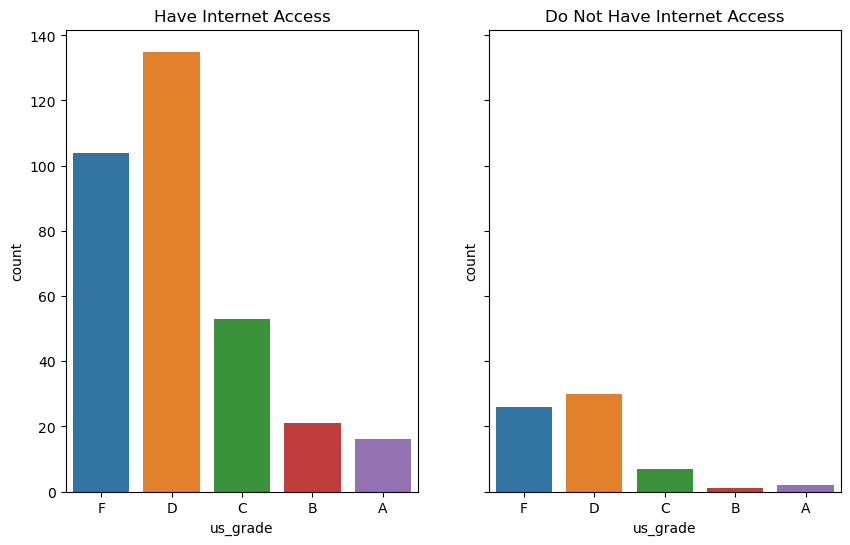

In [23]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['internet']== 'yes'], ax = ax[0])
ax[0].set_title('Have Internet Access')
sns.countplot(x = 'us_grade', data = student.loc[student['internet']== 'no'], ax = ax[1])
ax[1].set_title('Do Not Have Internet Access')
plt.show();

## Observations:

Most of the students that are performing well, do have internet access.

### Let's see the grades for students older than 18 verses younger students.

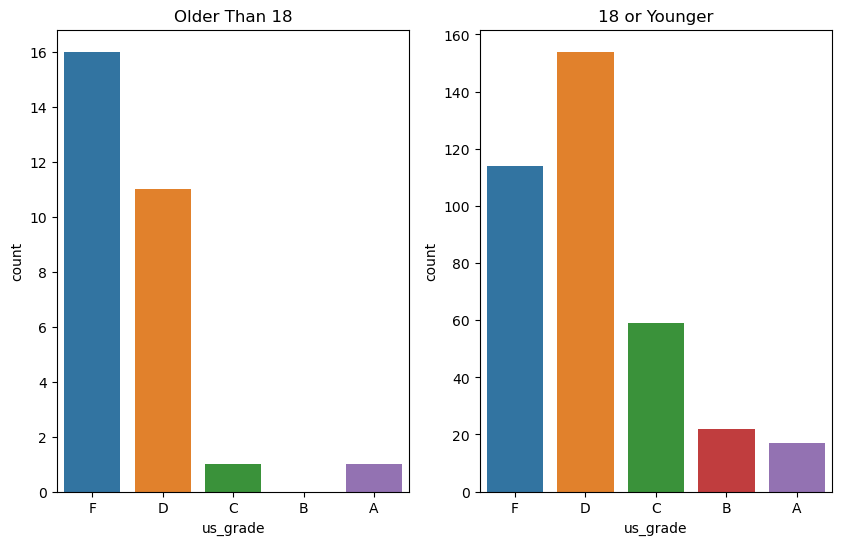

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['age']> 18], ax = ax[0])
ax[0].set_title('Older Than 18')
sns.countplot(x = 'us_grade', data = student.loc[student['age']<= 18], ax = ax[1])
ax[1].set_title('18 or Younger')
plt.show();

## Observations:

2 of the older students are doing well; the rest are barely passing or failing. Let's see what these older students' responses are for the other variables.

In [25]:
student_older = student.loc[student['age']>18]
student_older.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,us_grade
127,GP,F,19,U,GT3,T,0,1,at_home,other,...,4,2,1,1,5,2,7,8,9,F
153,GP,M,19,U,GT3,T,3,2,services,at_home,...,5,4,1,1,4,0,5,0,0,F
210,GP,F,19,U,GT3,T,3,3,other,other,...,3,3,1,2,3,10,8,8,8,F
247,GP,M,22,U,GT3,T,3,1,services,services,...,4,5,5,5,1,16,6,8,8,F
257,GP,M,19,U,LE3,A,4,3,services,at_home,...,3,1,1,1,1,12,11,11,11,D
270,GP,F,19,U,GT3,T,3,3,other,services,...,3,5,3,3,5,15,9,9,9,F
296,GP,F,19,U,GT3,T,4,4,health,other,...,3,4,2,3,2,0,10,9,0,F
304,GP,M,19,U,GT3,T,3,3,other,other,...,4,4,1,1,3,20,15,14,13,D
306,GP,M,20,U,GT3,A,3,2,services,other,...,5,3,1,1,5,0,17,18,18,A
307,GP,M,19,U,GT3,T,4,4,teacher,services,...,3,4,1,1,4,38,8,9,8,F


In [26]:
student_older.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000,29.000000
mean,19.275862,2.241379,1.965517,1.413793,2.000000,1.310345,4.068966,3.482759,3.034483,1.689655,2.137931,3.448276,9.827586,10.448276,9.620690,8.758621
std,0.701862,1.154345,0.981353,0.682288,0.801784,1.003688,0.752664,1.183840,1.085053,1.105294,1.156477,1.325201,10.710705,3.355020,3.374418,4.718165
min,19.000000,0.000000,1.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,5.000000,0.000000,0.000000
25%,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,2.000000,8.000000,8.000000,8.000000
50%,19.000000,2.000000,2.000000,1.000000,2.000000,1.000000,4.000000,4.000000,3.000000,1.000000,2.000000,3.000000,5.000000,10.000000,9.000000,9.000000
75%,19.000000,3.000000,3.000000,2.000000,2.000000,2.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,15.000000,13.000000,12.000000,11.000000
max,22.000000,4.000000,4.000000,3.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,40.000000,17.000000,18.000000,18.000000


## The oldest student (22 years old) says he has a lot of free time, goes out alot, and drinks alot both during the week and on the weekend. He also rates his overall health very low. He has been scoring F's since the first period. 

## Looking at the means for this group, most parents did not finish high school and they have a lot of absences.

## Let's look closer at students whose parents did not finish high school...

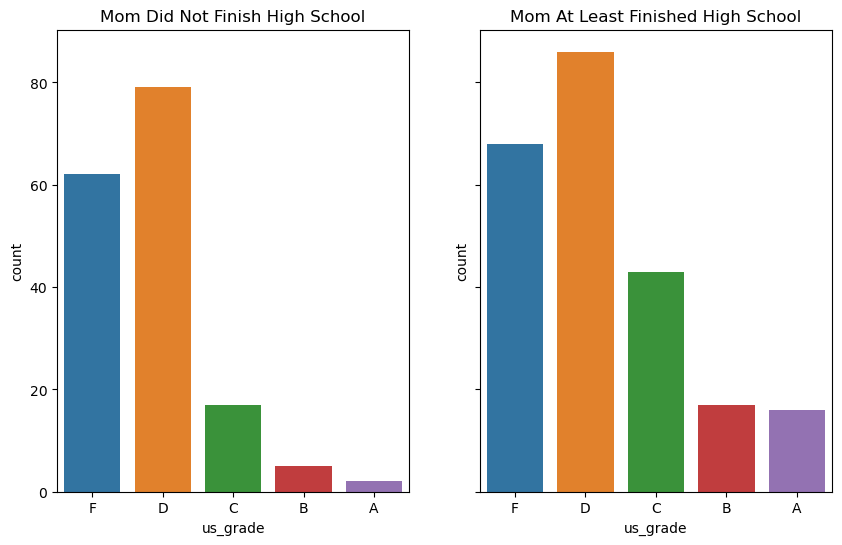

In [27]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['Medu']< 3], ax = ax[0])
ax[0].set_title('Mom Did Not Finish High School')
sns.countplot(x = 'us_grade', data = student.loc[student['Medu']>= 3], ax = ax[1])
ax[1].set_title('Mom At Least Finished High School')
plt.show();

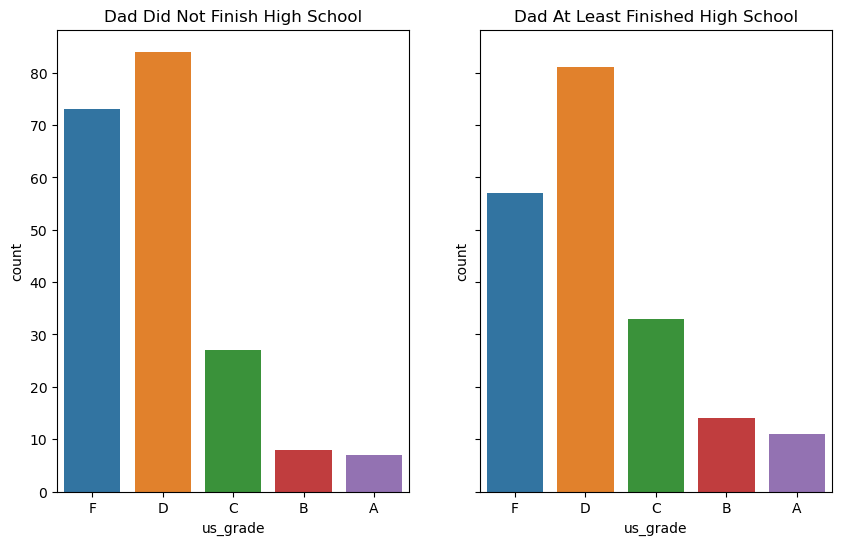

In [28]:
fig, ax = plt.subplots(1, 2, sharey = True, figsize = (10, 6))
sns.countplot(x = 'us_grade', data = student.loc[student['Fedu']< 3], ax = ax[0])
ax[0].set_title('Dad Did Not Finish High School')
sns.countplot(x = 'us_grade', data = student.loc[student['Fedu']>= 3], ax = ax[1])
ax[1].set_title('Dad At Least Finished High School')
plt.show();

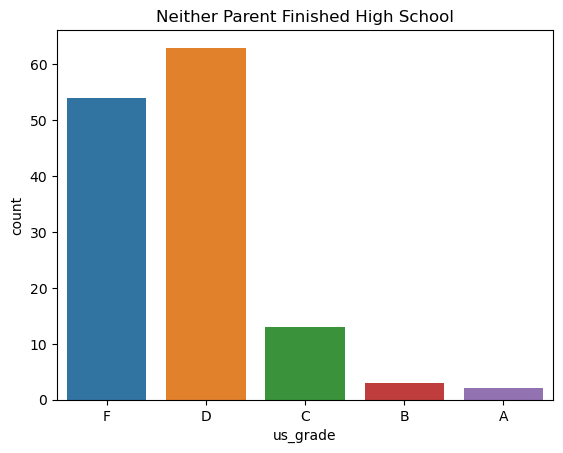

In [29]:
mom_and_dad = student.loc[(student['Medu']<3)&(student['Fedu']<3)]
sns.countplot(x = 'us_grade', data = mom_and_dad)
plt.title('Neither Parent Finished High School');

## Observations:

There is a lower rate of A's, B's, and C's for students whose parents did not complete high school. 

## Next, let's look at the correlations for absences, G1, G2, and G3. 

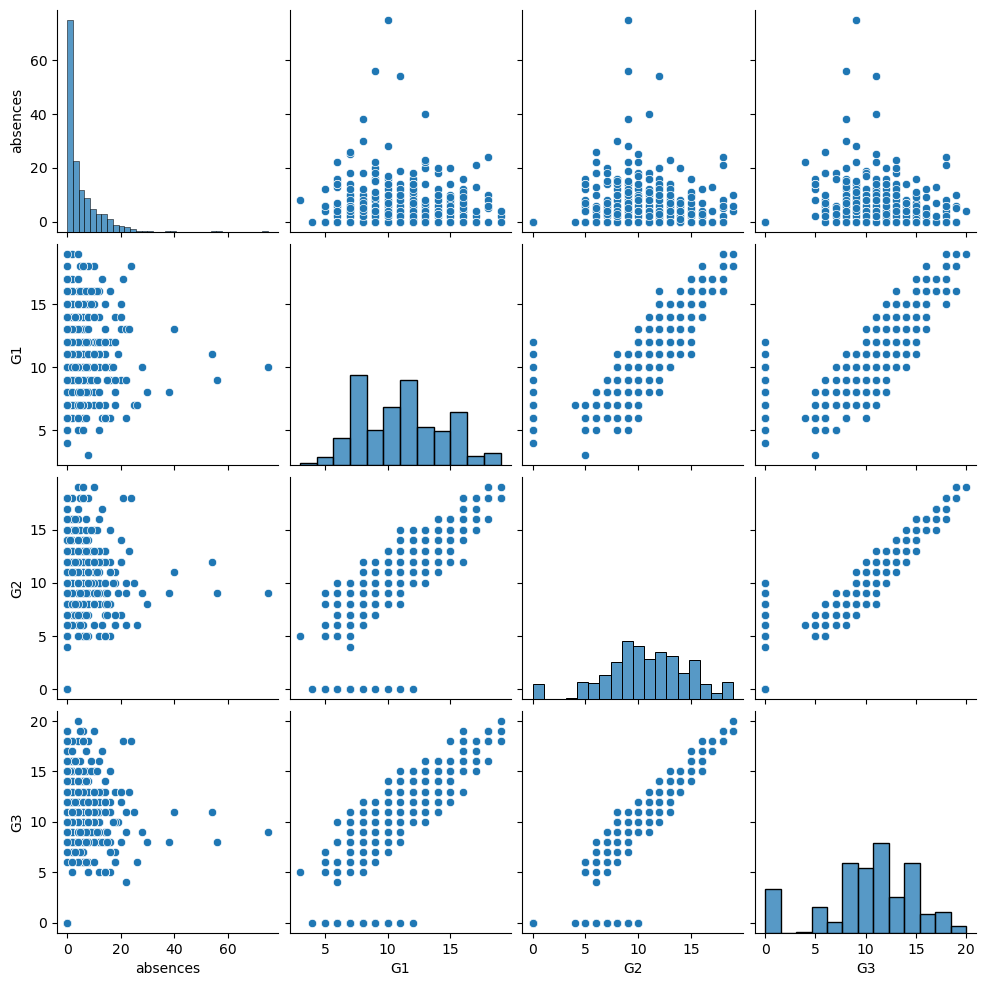

In [30]:
ab_and_grades = student[['absences', 'G1', 'G2', 'G3']]
sns.pairplot(ab_and_grades)

## Observations:

The highest number of absences scores below 10 in all three grading periods. For students with 20 abs or less, we see a pretty big spread of scores. The highest scores do have fewer absences. 

G1, G2, and G3 all have very strong positve correlation. This shows that students with low scores in G1 and G2, usually have low scores in G3. Similar for starting out with high scores. 


## Lastly, let's divide our main dataframe into two subsets: struggling students with D's and F's and successful students with A's, B's, and C's.

In [31]:
student_struggle = student.loc[(student['us_grade'] == 'F') | (student['us_grade'] == 'D')]

In [32]:
student_struggle.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000
mean,16.806780,2.593220,2.430508,1.505085,1.976271,0.433898,3.908475,3.223729,3.162712,1.572881,2.416949,3.627119,6.362712,9.545763,9.183051,8.650847
std,1.288339,1.080417,1.075904,0.741717,0.797176,0.825736,0.900734,0.995285,1.140160,0.972729,1.319291,1.331184,8.790105,2.468256,2.961267,3.869046
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,8.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,10.000000,10.000000,10.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,1.000000,4.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.500000,11.000000,11.000000,11.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,16.000000,14.000000,13.000000


In [33]:
student_success = student.loc[(student['us_grade'] == 'A') | (student['us_grade'] == 'B') | (student['us_grade'] == 'C')]
student_success.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.00000
mean,16.370000,3.210000,2.790000,1.280000,2.210000,0.040000,4.050000,3.270000,2.950000,1.210000,1.920000,3.340000,3.78000,14.930000,15.230000,15.62000
std,1.186243,1.007998,1.085208,0.514045,0.935225,0.242878,0.880484,1.013594,1.018763,0.498381,1.116271,1.538857,4.51838,1.970771,1.638273,1.56205
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,10.000000,12.000000,14.00000
25%,15.000000,3.000000,2.000000,1.000000,1.750000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.00000,14.000000,14.000000,14.00000
50%,16.000000,4.000000,3.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.00000,15.000000,15.000000,15.00000
75%,17.000000,4.000000,4.000000,1.250000,3.000000,0.000000,5.000000,4.000000,4.000000,1.000000,3.000000,5.000000,6.00000,16.000000,16.000000,16.00000
max,20.000000,4.000000,4.000000,3.000000,4.000000,2.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,24.00000,19.000000,19.000000,20.00000


## Observations

Looking at the mean values for these two groups, we see more successful students have:

1) parents with more education.

2) shorter travel time to school from home. 

3) more time studying each week. 

4) better family relationships

5) more freetime

6) go out less with friends

7) drink less alchol

8) have fewer absences

Some surprising difference between these two groups:

Lower performing students rate their health higher than higher performing students. 

## Final Thoughts

There are several early indicators of students that will struggle in school. One very strong indicator is their G1 grade. However, it would be most benefical to intervene before the first grading period is over. For that time, we need to pay attention to factors like how much support they have at home, their parent's educational background, the number absences they are accumulating, whether or not they have internet access at home. 

This is just the beginning of digging into what we can learn from this dataset. I would also be very interested to see if there are clusters within this dataset, and investigate what these groups have in common. 

Overall, it is clear that home life has a significant impact on a student's success in school. 